## Python Machine Learning Midterm
Midterm Objective:
- **Finding Maximal Likelihood**
- **Object Oriented Programming**
- **Implementing Various Linear Models Through Objective Numerical Minimization**

### Problem 1: Finding Maximal Likelihood
- In this question, we would like to find the maximal likelihood point of a **Gaussian Mixture** **pdf** function
- Suppose that there are three bivariate (i.e. $2D$) normal distributions with
   - $A:\mu=(1,1), cov= \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
  \end{array} } \right]$
   - $B:\mu=(-1,0), cov= 
  \left[ {\begin{array}{cc}
   2 & 1 \\
   1 & 2 \\
  \end{array} } \right]
$
   - $C:\mu=(-3,1), cov=\left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
  \end{array} } \right]$
    
Given a random variate of $2D$, suppose that there is $20\%$ chance it is generated from $A$, $50\%$ from $B$, $30\%$
 from $C$ (this is known as a Gaussian mixture random variable)
    
Please find the $x,y$ coordinates where its **pdf** takes global maximum.   

${\bf Hint}$: The $n\times n$ identify array can be contructed by calling $np.eye(n)$.

- The following function based on **scipy.stats** **multivarite_normal** is vital to the solution

In [1]:
import numpy as np
from scipy.stats import multivariate_normal

def f(x, mu = np.ones(2), cov = np.eye(2)):
    return multivariate_normal.pdf(x, mean=mu, cov=cov)

## Step 1
- Please use the above function $f$ as a building block to define the **pdf**, called $g$, of the above **Gaussian mixture**
- The function $g$ should not hard-code the weights $(0.2, 0.5, 0.3)$, instead you should make them tunable through **\*args**.
- This is to make sure the same code would work for different 3-tuple weights $(p_1, p_2, p_3)$.

In [2]:
cov2 = np.array([[2,1],[1,2]])
mu3  = np.array([-3,1])

def g(x, *args):
    pass

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.rcParams['figure.figsize'] =  (20,10)

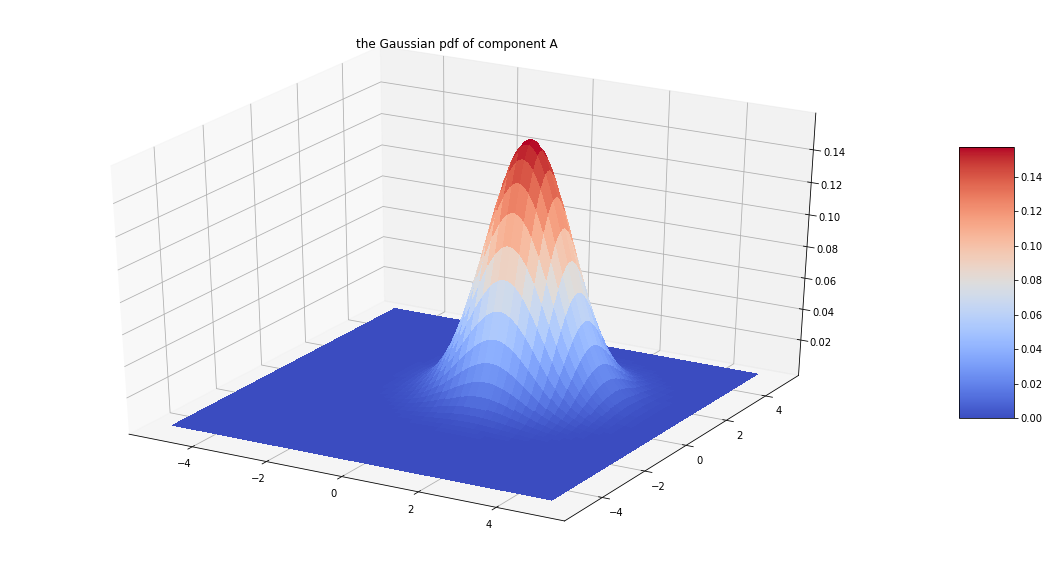

In [1]:
from IPython.display import Image
Image("img/pdf_of_component_A.png")

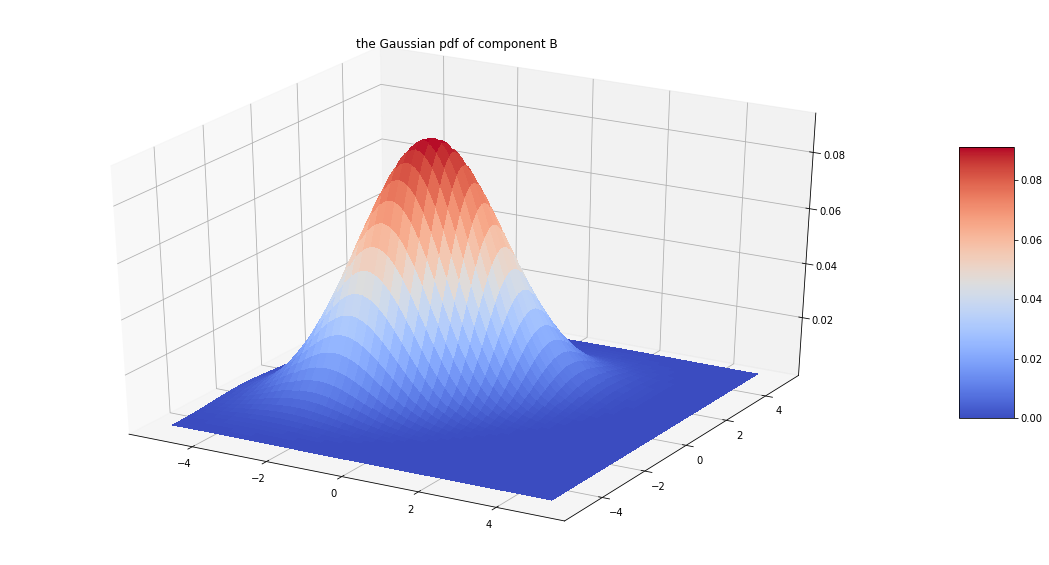

In [2]:
Image("img/pdf_of_component_B.png")

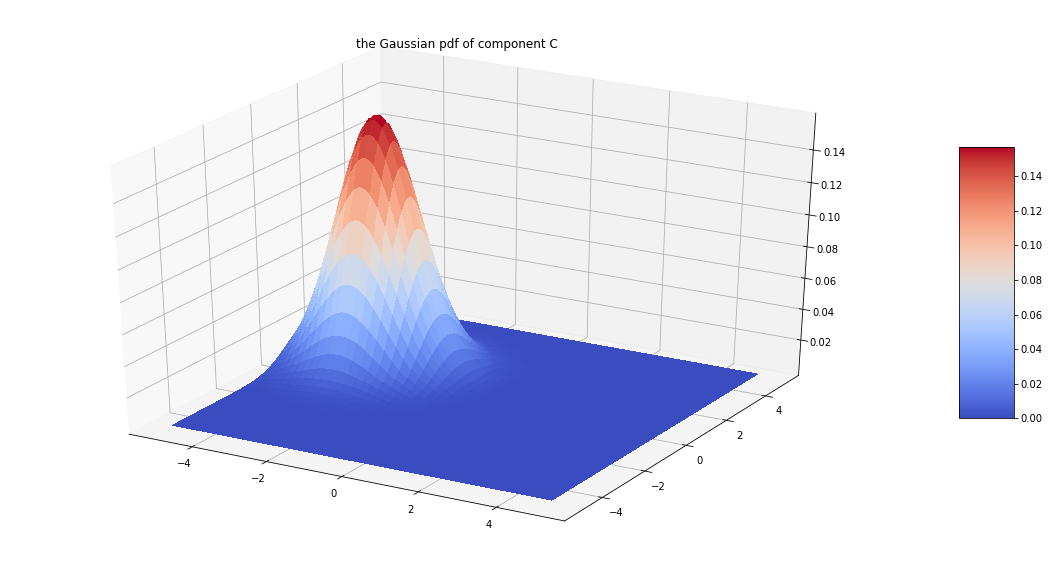

In [3]:
Image("img/pdf_of_component_C.png")

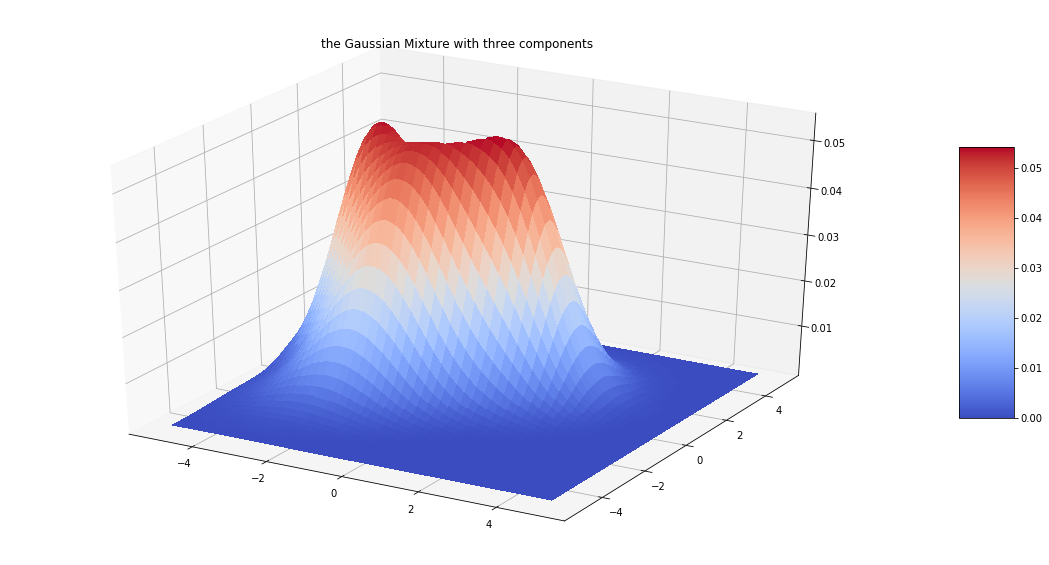

In [4]:
Image("img/pdf_of_a_gaussian_mixture.png")

## Step 2
- use the function **minimize** in scipy.optimize to find the local maximum of **g** with the initial point at $(0,0)$
- scipy.optimize has no **maximize** function, so you would need to find the local maximum of $g$ through **minimize**.
- 'Nelder-Mead' is a non-gradient based optimization method for objective functions. We use this scheme to avoid the need to
code the gradient expression in **numpy** explicitly.
- Please refer to the wiki page https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method for more details

In [8]:
from scipy.optimize import minimize

In [9]:
## disp = True turns on the iteration result output
## disp = False turns off the iteration result output
## Nelder-Mead is an optimization method which does not make use of function gradient 
option_output = {'maxiter':1000, 'disp':True}
sol = ?
sol['x']

Optimization terminated successfully.
         Current function value: -0.054578
         Iterations: 69
         Function evaluations: 133


array([0.24061337, 0.82373128])

## Step 3
- Propose your idea to find the global maximum of $g$ (${\bf Hint}$ The situation is very similar to what you encoutner in **kmeans**, that a single run only gives you a local minimum)
- Implement your idea into python code

- The function np.round can be useful to round numerical solutions to certain decimal points 

- The function np.random.uniform can be useful to generate an array of random numbers within a range [low, high]

- Because a single run of **minimize** only gives us the local minimum, we need to randomize our initial conditions 
to find the global minimum of the objective function. This is similar to the procedure built into **kmeans**. 

## Problem 2 
- The goal of this question is to design several classes to implment 
   - multiple linear regression
   - ridge regression
   - lasso regression
 
- These classes should be able to accept either numpy array or pandas dataframe/series as input
- They should have **fit(X,y)**, **predict(X)** methods similar to their **sklearn** counter-parts
- They should have attributes, **coef_**, **intercept_** to store regression coefficients and the intercept
- They have **set_params**, **get_params** methods

## Extra Credit: Step 0
- Design a base class using **object oriented design** to do the following things
   - The base class should initialize the parameter $\alpha$ as an object attribute with default value $1$
   - The base class should initialize the parameter **max_iter** with default value $2000$
   - the base class should initialize the parameter **tol** (tolerance) with default value None 
    (when it is None, it will be ignored without being passed to the underlying **minimize** function) )
   - The base class should have an attribute method called **loss**, which is the loss function of the model
   - The base class should initialize the intercept_ attribute to $0$
   - The base class should initialize the coef_ attribute to None
   - The base class should have a **set_params** method and a **get_params** method to reset and access the parameter $C$
   - The **fit** method finds the argmin (i.e. the location of the minimum) of **loss** with a specified max_iter and store the result to 
(intercept, coef) into the object attributes
   - The **fit** method needs to call **minimize** from scipy.optimize to search the minimal location
   - The **fit** method needs to store the **num_iter** used in the iteration
   - The **fit** method needs to store the minimal **loss** value
   - The **predict** method which takes the numpy array (nested list, or pandas dataframe) and outputs the prediction

- ${\bf Hint}$: A python object has a built_in **dict** attribute __dict__ storing the object attributes and their values

In [13]:
class BaseRegressor(object):
    
    def __init__(self):
        pass
    
    def set_params(self, **kwargs): # throw an exception if the input C is not a float
        pass
    
    def get_params(self, keyString): 
        pass
    
    def fit(self, X, y, init=None):
        pass
        
    def predict(self, X):    # X is a 2D array-like object
        pass
    
    def augment(self, X):
        pass
    
    def rss(self, X0, y, beta):
        pass
    
    def _parseArgs(self, *args):
        pass       
    
    def loss(self, beta, *args):
        pass
        

# You May Consider Skipping the Extra Credit If Necessary
- Uncomment the following line of code if you would like to bypass this **extra-credit** step.

In [1]:
#from BaseRegressor import BaseRegressor

## Step 1
- Define an **MLRegressor** class, a **RidgeRegressor** class, a **LassoRegresor** class inheriting
the **BaseRegressor** class
- Each class needs to overwrite the **loss** function to **RSS**, **RSS+${\lambda}{\bf Penalty}_{L^2}$**, **RSS+${\lambda} {\bf Penalty}_{L^1}$**, respectively
- The Lasso penalty term ${\bf Penality}_{L^1}$ is normalized to be ${2\cdot n_{sample}}\sum_j |\beta_j|$, where $n_{sample}$ is the number of samples

In [14]:
class MLRegressor(BaseRegressor):
    
    def __init__(self):
        pass
        
    def loss(self, beta, *args):
        pass

In [15]:
class RidgeRegressor(BaseRegressor):
    
    def __init__(self):
        pass
        
    def loss(self, beta, *args):
        pass    

In [16]:
class LassoRegressor(BaseRegressor):
    
    def __init__(self):
        pass
    
    def loss(self, beta, *args):
        pass

## Step 3
- Load the **sklearn** **LinearRegression**, **Ridge**, **Lasso**, and train
the models with the iris data. Compare the coefficients of linear regression coefficients and verify that they match 
with the models you build (with **tol=1e-8**) in **Step 2**

- For **Ridge**, **Lasso** please select $\alpha$ to be $1$ for the comparison. 

In [17]:
mlr   = MLRegressor()
ridge = RidgeRegressor()
lasso = LassoRegressor()

mlr.set_params(tol=1e-8, verbose=True)
ridge.set_params(tol=1e-8, verbose=True)
lasso.set_params(tol=1e-8, verbose=True)

In [18]:
# Load iris data set from sklearn

In [19]:
# Train your models

Optimization terminated successfully.
         Current function value: 5.376166
         Iterations: 466
         Function evaluations: 806
Optimization terminated successfully.
         Current function value: 5.726329
         Iterations: 428
         Function evaluations: 737
Optimization terminated successfully.
         Current function value: 0.285197
         Iterations: 835
         Function evaluations: 1418


In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# construct sklearn multi-linear model, ridge model and lasso model

In [21]:
# Compare the model coefficients of your multi-linear regressor and sklearn's version


[-0.21   0.229  0.526] [-0.21   0.229  0.526]
-0.249 -0.249


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


# Compare the model coefficients of your Ridge regressor and sklearn's version


In [23]:
# Compare the model coefficients of your Lasso regressor and sklearn's version


[ 0.    -0.01   0.089] [ 0.    -0.     0.093]
0.887 0.849


## Step 4
- Do the coefficients from all the models you have built and trained match with the model coefficient outputs from the **sklearn** verions?
- If all of them do not match, double check your implementations for bugs?
- If some of the models does not work, refitting your model by adjusting the init variable of your own model 
to make sure the result matches with **sklearn's** version.
- ${\bf Hint}$: 
the **np.random.randint** function can be useful for you to randomize your initial point